In [1]:
import tensorflow as tf
tf.random.set_seed(0)
import numpy as np
import matplotlib.pyplot as plt
from nn.model_base import edl_classifier4psedo_data, EDLModelBase
from nn.losses import EDLLoss
import os, sys
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [2]:
# 仮データの作成
def psedo_data(row, col, x_bias, y_bias):
    # 極座標で考える
    row, col = (100, 2)
    r_class0 = tf.random.uniform(shape=(row,), minval=0, maxval=0.5)
    theta_class0 = tf.random.uniform(shape=(row,), minval=0, maxval=np.pi*2)
    r_class1 = tf.random.uniform(shape=(row,), minval=0.5, maxval=1)
    theta_class1 = tf.random.uniform(shape=(row,), minval=0, maxval=np.pi*2)
    input_class0 = (x_bias+r_class0*np.cos(theta_class0), y_bias+r_class0*np.sin(theta_class0))
    input_class1 = (x_bias+r_class1*np.cos(theta_class1), y_bias+r_class1*np.sin(theta_class1))
    x_train = tf.concat([input_class0, input_class1], axis=1)
    x_train = tf.transpose(x_train)
    y_train_0 = [0 for _ in range(row)]
    y_train_1 = [1 for _ in range(row)]
    y_train = y_train_0 + y_train_1
    x_test = None
    y_test = None
    return (x_train, x_test), (y_train, y_test)

In [3]:
(x_train, x_test), (y_train, y_test) = psedo_data(row=100, col=2, x_bias=0, y_bias=0)
# plt.scatter(x_train[:100,0], x_train[:100,1], c="r")
# plt.scatter(x_train[100:,0], x_train[100:,1], c="b")
# plt.show()

In [4]:
inputs = tf.keras.Input(shape=(2,))
outputs = edl_classifier4psedo_data(x=inputs, use_bias=True, hidden_dim=16)
model = EDLModelBase(inputs=inputs, outputs=outputs, n_class=2)
model.compile(optimizer=tf.keras.optimizers.Adam(),loss=EDLLoss(K=2, annealing=0.1),metrics=["accuracy"])

In [5]:
# モデルの学習
model.summary()
model.fit(x=x_train, y=np.array(y_train), epochs=200, verbose=2)

Model: "edl_model_base"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 16)                48        
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 34        
Total params: 354
Trainable params: 354
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
7/7 - 1s - loss: 0.6110 - accuracy: 0.5500
Epoch 2/200
7/7 - 0s - loss: 0.6082 - accuracy: 0.4900
Epoch 3/200
7/7 - 0s - loss: 0.6049 - accuracy: 0.5400
Epoch 4/200
7/7 - 0s - loss: 0.6018 - accuracy: 0.5950
Epoch 5/200
7/7 - 0s - loss: 0.5

In [6]:
# 結果の出力(訓練データそのまま)
evidence = model(x_train)
alpha = evidence + 1
y_pred = alpha/tf.reduce_sum(alpha, axis=1, keepdims=True)
unc = 2/tf.reduce_sum(alpha, axis=1, keepdims=True)

No handles with labels found to put in legend.


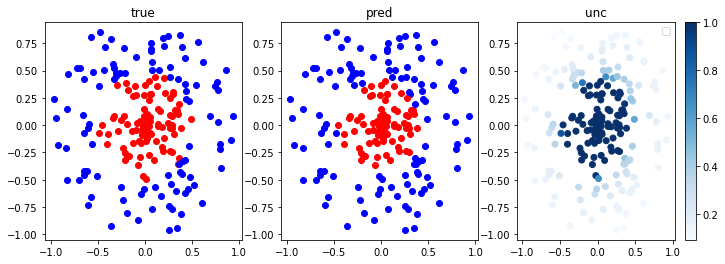

In [7]:
# 2次元空間での不確かさの出力
# グラデーションを作る
# 正解の散布図
figure = plt.figure(figsize=(12,4))
ax = figure.add_subplot(131)
ax.scatter(x_train[:100,0], x_train[:100,1], c="r")
ax.scatter(x_train[100:,0], x_train[100:,1], c="b")
ax.set_title("true")
# 予測の散布図
ax = figure.add_subplot(132)
ax.set_title("pred")
y_pred_ctg = np.argmax(y_pred, axis=1)
for x, label in zip(x_train, y_pred_ctg):
    if label == 0:
        ax.scatter(x[0], x[1], c="r")
    elif label == 1:
        ax.scatter(x[0], x[1], c="b")
    else:
        print("exception has occured")
        sys.exit(1)
# 不確かさの分布
ax = figure.add_subplot(133)
ax.set_title("unc")
im = ax.scatter(x_train[:,0], x_train[:,1], c=unc, cmap='Blues')
cbar = figure.colorbar(im)
plt.legend()
plt.show()

In [8]:
# 結果の出力(EUのデータを無理やり作成))
"""
multiplied_x_train = x_train*10
evidence = model(multiplied_x_train)
alpha = evidence + 1
y_pred = alpha/tf.reduce_sum(alpha, axis=1, keepdims=True)
unc = 2/tf.reduce_sum(alpha, axis=1, keepdims=True)
"""

'\nmultiplied_x_train = x_train*10\nevidence = model(multiplied_x_train)\nalpha = evidence + 1\ny_pred = alpha/tf.reduce_sum(alpha, axis=1, keepdims=True)\nunc = 2/tf.reduce_sum(alpha, axis=1, keepdims=True)\n'

In [9]:
# 2次元空間での不確かさの出力
# グラデーションを作る
# 正解の散布図
"""
figure = plt.figure(figsize=(12,4))
ax = figure.add_subplot(131)
ax.scatter(multiplied_x_train[:100,0], multiplied_x_train[:100,1], c="r")
ax.scatter(multiplied_x_train[100:,0], multiplied_x_train[100:,1], c="b")
# 予測の散布図
ax = figure.add_subplot(132)
y_pred_ctg = np.argmax(y_pred, axis=1)
for x, label in zip(multiplied_x_train, y_pred_ctg):
    if label == 0:
        ax.scatter(x[0], x[1], c="r")
    elif label == 1:
        ax.scatter(x[0], x[1], c="b")
    else:
        print("exception has occured")
        sys.exit(1)
# 不確かさの分布
ax = figure.add_subplot(133)
im = ax.scatter(multiplied_x_train[:,0], multiplied_x_train[:,1], c=unc, cmap='Blues')
cbar = figure.colorbar(im)
"""

'\nfigure = plt.figure(figsize=(12,4))\nax = figure.add_subplot(131)\nax.scatter(multiplied_x_train[:100,0], multiplied_x_train[:100,1], c="r")\nax.scatter(multiplied_x_train[100:,0], multiplied_x_train[100:,1], c="b")\n# 予測の散布図\nax = figure.add_subplot(132)\ny_pred_ctg = np.argmax(y_pred, axis=1)\nfor x, label in zip(multiplied_x_train, y_pred_ctg):\n    if label == 0:\n        ax.scatter(x[0], x[1], c="r")\n    elif label == 1:\n        ax.scatter(x[0], x[1], c="b")\n    else:\n        print("exception has occured")\n        sys.exit(1)\n# 不確かさの分布\nax = figure.add_subplot(133)\nim = ax.scatter(multiplied_x_train[:,0], multiplied_x_train[:,1], c=unc, cmap=\'Blues\')\ncbar = figure.colorbar(im)\n'

In [4]:
# カスタムトレーニング
inputs = tf.keras.Input(shape=(2,))
outputs = edl_classifier4psedo_data(x=inputs, use_bias=True, hidden_dim=8)
model = tf.keras.Model(inputs=inputs, outputs=outputs)
# 最適化関数の設定
optimizer = tf.keras.optimizers.Adam()
# メトリクスの作成
# true side : カテゴリカルな状態，pred side : クラスの次元数（ソフトマックスをかける前）
train_acc_metric = tf.keras.metrics.SparseCategoricalAccuracy()
epochs = 200
time_hparam = 1
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.shuffle(buffer_size=x_train.shape[0]).batch(batch_size=32)

for epoch in range(epochs):
    loss_fn = EDLLoss(K=2, annealing=min(1.0, epoch/epochs*time_hparam))
    print(f"エポック:{epoch}")
    # エポック内のバッチサイズごとのループ
    for step, (x_batch_train, y_batch_train) in enumerate(train_dataset):
        # 勾配を計算
        with tf.GradientTape() as tape:
            # NOTE : x_batch_trainの次元は3である
            #assert np.ndim(x_batch_train) == 3
            # dataset.shuffleを入れることによってバッチサイズを設定できる
            evidence = model(x_batch_train, training=True)
            alpha = evidence+1
            y_pred = alpha/tf.reduce_sum(alpha, axis=1, keepdims=True)
            loss_value = loss_fn.call(y_batch_train, alpha)  # NOTE : one-hotの形で入れるべき？
            
        grads = tape.gradient(loss_value, model.trainable_weights)
        optimizer.apply_gradients(zip(grads, model.trainable_weights))
            
        train_acc_metric.update_state(y_batch_train, y_pred)
    
    # エポックの終わりにメトリクスを表示する
    train_acc = train_acc_metric.result()
    print(f"訓練一致率：{train_acc:.2%}")
    # エポックの終わりに訓練メトリクスを初期化
    train_acc_metric.reset_states()

エポック:0


InvalidArgumentError: cannot compute Sub as input #1(zero-based) was expected to be a int32 tensor but is a float tensor [Op:Sub]